### Importación de datos



In [59]:
import pandas as pd

In [60]:


url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


# 1. Análisis de facturación



En este primer análisis, calculamos el ingreso total de cada tienda. Sumando los valores de la columna 'Precio' de cada conjunto de datos de la tienda para estimar los ingresos, almacenandolos en una lista aparte para luego poder mostrar los datos con un gráfico de barras

In [61]:
ingresos_totales = []
# iteramos sobre cada una de las tiendas
for tienda in (tienda1, tienda2, tienda3, tienda4):
    # usamos la función suma() sobre la lista de precios en tienda["Precio"] para obtener la sumatoria de todos los valores, y a ese resultado lo agregamos a la lista
    ingresos_totales.append(sum(tienda["Precio"]))
    # al estar ordenadas las tiendas en (tienda1, tienda2, tienda3, tienda4), dentro de la lista ingresos_totales, los valores estarán ordenados respectivamente a cada tienda

print(f'La tienda qué más vendió fue la número {ingresos_totales.index(max(ingresos_totales))+1} ')
# la explicación de esta estructura    ingresos_totales.index(max(ingresos_totales))+1    es la siguiente
# con max(ingresos_totales) obtenemos el máximo valor dentro de la lista
# usamos ingresos_totales.index(max(ingresos_totales)) para obtener cuál es el index del elemento con máximo valor
# y finalmente adicionamos 1 con ingresos_totales.index(max(ingresos_totales))+1 para que nos dé el respectivo número de tienda, ya que los index de una lista inician en 0 pero nuestras tiendas comienzan numeradas con 1
# entonces obtenemos finalmente el número de la tienda que tuvo el máximo de ventas

La tienda qué más vendió fue la número 1 


In [62]:
# se crea la variable tienda con el código anterior, la vamos a eliminar para que no moleste ya que es innecesaria y usamos ese nombre en varias funciones
del tienda

In [63]:
!pip install matplotlib==3.8.1

In [64]:
import matplotlib.pyplot as plt

In [65]:
# creamos esta lista con el nombre de las tiendas para poder mostrarlos en el eje x del gráfico de barras
tiendas = ['Tienda1', 'Tienda2', 'Tienda3', 'Tienda4']

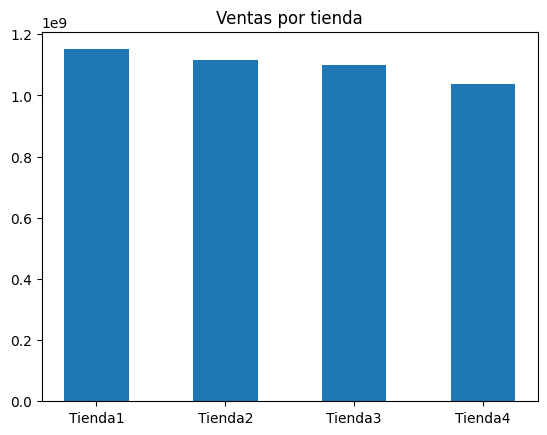

In [66]:
# mostramos la venta por tienda en un gráfico de barras
plt.title("Ventas por tienda")
plt.bar(x = tiendas, height = ingresos_totales, width=0.5)
plt.show()


In [67]:
# Creamos una lista de diccionarios donde almacenaremos los datos que vamos estudiando de las tiendas.
# Cada elemento de la lista, será un diccionario correspondiente a una tienda, que será iniciado con el nombre de la tienda
datos = [{'nombre': 'Tienda1'}, {'nombre': 'Tienda2'}, {'nombre': 'Tienda3'}, {'nombre': 'Tienda4'}]

for i in range(4):
    # agregamos los datos de la de lista de ingresos_totales obtenida previamente
    datos[i]['ingresos totales']=ingresos_totales[i]

# visualizamos cómo queda
datos


[{'nombre': 'Tienda1', 'ingresos totales': 1150880400.0},
 {'nombre': 'Tienda2', 'ingresos totales': 1116343500.0},
 {'nombre': 'Tienda3', 'ingresos totales': 1098019600.0},
 {'nombre': 'Tienda4', 'ingresos totales': 1038375700.0}]

In [68]:
# imprimimos el encabezado de la tabla
print(f"{'Tienda'.center(20)} | {'Tienda1'.center(15)} | {'Tienda2'.center(15)} | {'Tienda3'.center(15)} | {'Tienda4'.center(15)}")
# imprimimos los valores de los ingresos totales, respectivamente a la tienda
print(f"{'Ingresos totales'.center(20)} | {str(datos[0]['ingresos totales']).center(15)} | {str(datos[1]['ingresos totales']).center(15)} | {str(datos[2]['ingresos totales']).center(15)} | {str(datos[0]['ingresos totales']).center(15)}")

       Tienda        |     Tienda1     |     Tienda2     |     Tienda3     |     Tienda4    
  Ingresos totales   |   1150880400.0  |   1116343500.0  |   1098019600.0  |   1150880400.0 


# 2. Ventas por categoría

En este paso calcularemos la cantidad de productos vendidos por categoría en cada tienda. 
La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

In [69]:
# dentro de cada elemento de la lista datos, se encuentra una tienda. A cada tienda añadiremos un elemento a su diccionario llamado "categorias", 
# el cuál será un diccionario que luego almacenará como llaves las distintas categorías y cuyos valores serán la cantidad de productos vendidos de esa categorías.
for i in range(4):
    # añadimos dentro de cada tienda el elemento llamado "categorias" que tendrá un diccionario vacío donde luego añadiremos las categorías con cantidad de productos vendidos por .
    datos[i]['categorias']={}

In [70]:
# inicializamos d como contador, para poder iterar dentro de la lista 'datos' con index(d), y así ir recorriendo cada tienda
d = 0

# vamos a iterar a través de las bases de datos de las distintas tiendas
for tienda in (tienda1,tienda2,tienda3,tienda4):

  # dentro de la tienda, ingresaremos a "Categoría del Producto"
  # tienda["Categoría del Producto"] nos devuelve un objeto de tipo pandas.core.series.Series
  # tienda['Categoría del Producto'].items() nos devuelve un objeto tipo zip
  # con list(tienda['Categoría del Producto'].items()) nos devuelve una lista de tuplas, donde el primer elemento será del registro, y el segundo la categoría de dicha venta, cuyo index será 1
  for categoria in list(tienda['Categoría del Producto'].items()):

    # por eso dentro de los items de categoría, para acceder propiamente el nombre de la categoría del producto, debemos usar categoria[1]
    
    # si la categoría ya existe dentro de nuestro registro de categorías en datos, adicionamos 1 a su valor, para saber cuántos productos fueron vendidos de esa categoría
    if categoria[1] in datos[d]['categorias']:
      datos[d]['categorias'][categoria[1]] += 1
    # si la categoría no existe en nuestro registro, la inicializamos con valor = 1
    else:
      datos[d]['categorias'][categoria[1]] = 1

  #para ordenar alfabéticamente las categorías
  datos[d]['categorias'] = dict(sorted(datos[d]['categorias'].items()))
  
  # para continuar al siguiente elemento de nuestra lista de datos, adicionamos uno a d que usamos como index para acceder a la tienda correspondiente en la lista 'datos'
  d+=1

datos  

[{'nombre': 'Tienda1',
  'ingresos totales': 1150880400.0,
  'categorias': {'Artículos para el hogar': 171,
   'Deportes y diversión': 284,
   'Electrodomésticos': 312,
   'Electrónicos': 448,
   'Instrumentos musicales': 182,
   'Juguetes': 324,
   'Libros': 173,
   'Muebles': 465}},
 {'nombre': 'Tienda2',
  'ingresos totales': 1116343500.0,
  'categorias': {'Artículos para el hogar': 181,
   'Deportes y diversión': 275,
   'Electrodomésticos': 305,
   'Electrónicos': 422,
   'Instrumentos musicales': 224,
   'Juguetes': 313,
   'Libros': 197,
   'Muebles': 442}},
 {'nombre': 'Tienda3',
  'ingresos totales': 1098019600.0,
  'categorias': {'Artículos para el hogar': 177,
   'Deportes y diversión': 277,
   'Electrodomésticos': 278,
   'Electrónicos': 451,
   'Instrumentos musicales': 177,
   'Juguetes': 315,
   'Libros': 185,
   'Muebles': 499}},
 {'nombre': 'Tienda4',
  'ingresos totales': 1038375700.0,
  'categorias': {'Artículos para el hogar': 201,
   'Deportes y diversión': 277,
  

In [71]:
# redactamos una función para mostrar con gráfico de barras las ventas por categoría de una tienda, donde tendrán distintos colores las 3 categorías más vendidas y la menos vendida
def mostrarDatosCategorias(ntienda):

    '''Función para  mostrar un gráfico de barras según el número de tienda dentro de la lista "datos" 
    
    ntienda: número de la tienda a graficar
    
    '''
    # lista para almacenar los valores a mostrar en el gráfico de la cantidad de ventas por categoría
    valores = []

    # lista para almacenar los colores de las barras del gráfico y luego modificarlos resltando las categorías más vendida y la menos vendida
    colores = []

    # dentro de datos ingresamos a la tienda deseada por indexación por eso a ntienda le restamos 1, y luego entramos a 'categorias', donde iteramos entre las distintas categorías de una tiendo
    for categoria in datos[ntienda-1]['categorias']:
        # añadimos a la lista 'valores' el valor de la categoría 
        valores.append(datos[ntienda-1]['categorias'][categoria])
        # añadimos el color establecido y lo añadimos a la lista de colores
        colores.append('#f9c74f')
    
    # para obtener una nueva lista de los valores ordenados, para luego buscar su index y también obtener el nombre de la categoría y cambiar el color de la barra correspondiente al index
    valoresOrdenados = sorted(valores, reverse=True)

    # para saber la categoría más vendida
    cantCategoriaMasVendida1 = valoresOrdenados[0]
    categoriaMasVendida1 = list(datos[ntienda-1]['categorias'])[valores.index(cantCategoriaMasVendida1)]
    # para cambiar su color de barra
    colores[valores.index(cantCategoriaMasVendida1)] = '#277da1'
    
    # para saber la segunda categoría más vendida
    cantCategoriaMasVendida2 = valoresOrdenados[1]
    categoriaMasVendida2 = list(datos[ntienda-1]['categorias'])[valores.index(cantCategoriaMasVendida2)]
    # para cambiar su color de barra
    colores[valores.index(cantCategoriaMasVendida2)] = '#4d908e'

    # para saber la tercera categoría más vendida
    cantCategoriaMasVendida3 = valoresOrdenados[2]
    categoriaMasVendida3 = list(datos[ntienda-1]['categorias'])[valores.index(cantCategoriaMasVendida3)]
    # para cambiar su color de barra
    colores[valores.index(cantCategoriaMasVendida3)] = '#43aa8b'

    # para saber la categoría menos vendida
    cantCategoriaMenosVendida = valoresOrdenados[-1]
    categoriaMenosVendida = list(datos[ntienda-1]['categorias'])[valores.index(cantCategoriaMenosVendida)]
    # para cambiar su color de barra
    colores[valores.index(cantCategoriaMenosVendida)] = '#f94144'

    # iniciamos el gráfico con su título, tamaño de fuente, espesor de la misma y color
    plt.title(f"Ventas por categoría en Tienda{ntienda}", fontsize=16, fontweight="bold", color='black')

    # asignamos argumentos al eje x e y, como también el color de las barras
    plt.bar(x = list(datos[ntienda-1]['categorias']), height = valores, color = colores)

    # damos inclinación a las etiquetas del eje x debido a que son muchas y se superponen
    plt.xticks(rotation=90)
    
    # mostramos el gráfico
    plt.show()

    # mostramos conclusión
    print(f'La categoría más vendida de la tienda{ntienda} es {categoriaMasVendida1} con {cantCategoriaMasVendida1} ventas')
    print(f'La categoría más vendida de la tienda{ntienda} es {categoriaMasVendida2} con {cantCategoriaMasVendida2} ventas')
    print(f'La categoría más vendida de la tienda{ntienda} es {categoriaMasVendida3} con {cantCategoriaMasVendida3} ventas')
    print(f'La categoría menos vendida de la tienda{ntienda} es {categoriaMenosVendida} con {cantCategoriaMenosVendida} ventas')

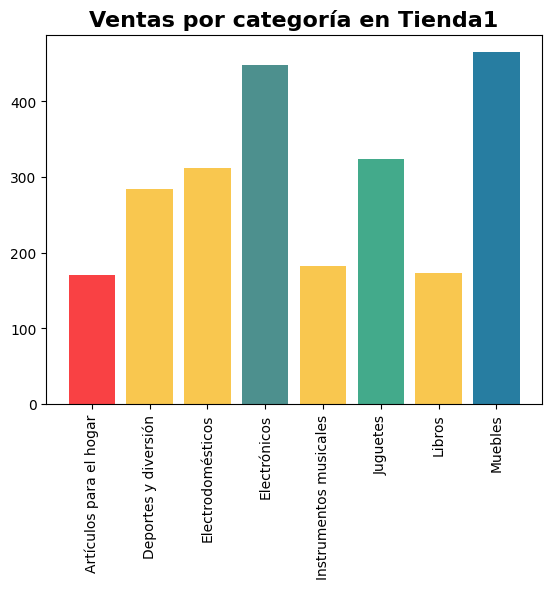

La categoría más vendida de la tienda1 es Muebles con 465 ventas
La categoría más vendida de la tienda1 es Electrónicos con 448 ventas
La categoría más vendida de la tienda1 es Juguetes con 324 ventas
La categoría menos vendida de la tienda1 es Artículos para el hogar con 171 ventas


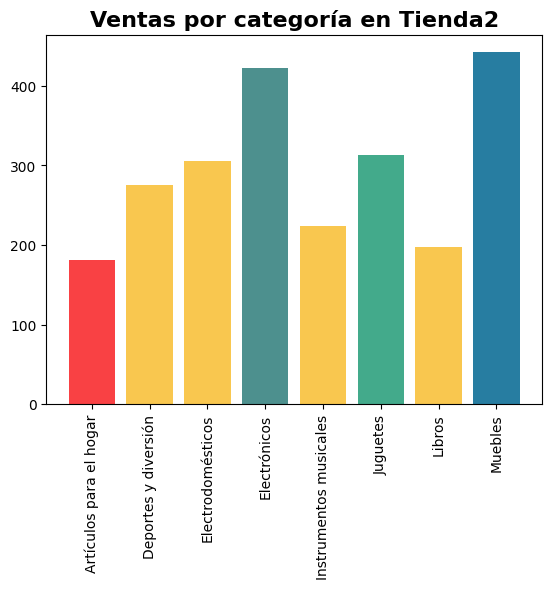

La categoría más vendida de la tienda2 es Muebles con 442 ventas
La categoría más vendida de la tienda2 es Electrónicos con 422 ventas
La categoría más vendida de la tienda2 es Juguetes con 313 ventas
La categoría menos vendida de la tienda2 es Artículos para el hogar con 181 ventas


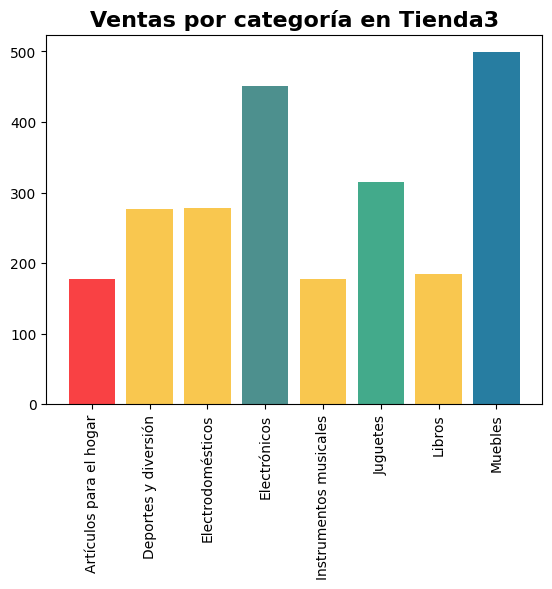

La categoría más vendida de la tienda3 es Muebles con 499 ventas
La categoría más vendida de la tienda3 es Electrónicos con 451 ventas
La categoría más vendida de la tienda3 es Juguetes con 315 ventas
La categoría menos vendida de la tienda3 es Artículos para el hogar con 177 ventas


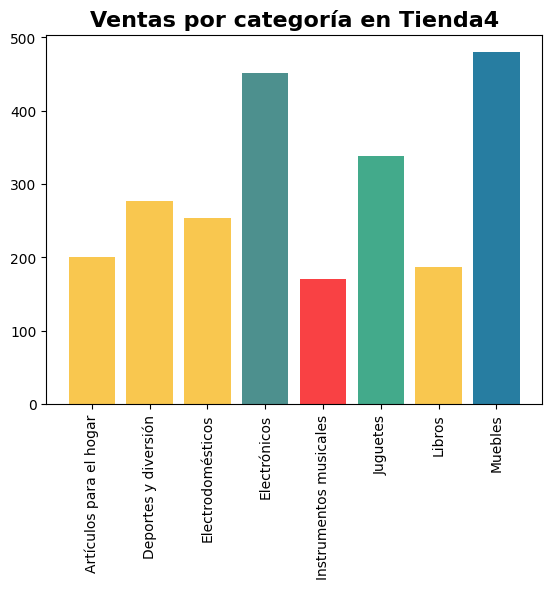

La categoría más vendida de la tienda4 es Muebles con 480 ventas
La categoría más vendida de la tienda4 es Electrónicos con 451 ventas
La categoría más vendida de la tienda4 es Juguetes con 338 ventas
La categoría menos vendida de la tienda4 es Instrumentos musicales con 170 ventas


In [72]:
mostrarDatosCategorias(1)
mostrarDatosCategorias(2)
mostrarDatosCategorias(3)
mostrarDatosCategorias(4)

Creando una salida por tabla para ver mejor la cantidad de productos vendidos por categoría por tienda

In [73]:
# imprimimos el encabezado de la tabla
print(f"{'Categoría':<30} | {'Tienda1'.center(10)} | {'Tienda2'.center(10)} | {'Tienda3'.center(10)} | {'Tienda4'.center(10)}")
# imprimimos los valores de la tebla iterando sobre las categorías y mostrando cantidad vendida por tienda y por categoría
for categoria in datos[0]['categorias']:
    print(f"{categoria:<30} | {str(datos[0]['categorias'][categoria]).center(10)} | {str(datos[1]['categorias'][categoria]).center(10)} | {str(datos[2]['categorias'][categoria]).center(10)} | {str(datos[3]['categorias'][categoria]).center(10)}")

Categoría                      |  Tienda1   |  Tienda2   |  Tienda3   |  Tienda4  
Artículos para el hogar        |    171     |    181     |    177     |    201    
Deportes y diversión           |    284     |    275     |    277     |    277    
Electrodomésticos              |    312     |    305     |    278     |    254    
Electrónicos                   |    448     |    422     |    451     |    451    
Instrumentos musicales         |    182     |    224     |    177     |    170    
Juguetes                       |    324     |    313     |    315     |    338    
Libros                         |    173     |    197     |    185     |    187    
Muebles                        |    465     |    442     |    499     |    480    


# 3. Calificación promedio de la tienda


En este paso, calculamos las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.

In [74]:
def calificacionMedia (tienda, ntienda):
    ''' Función definida para conocer la satisfacción del cliente con los productos vendidos.
    
    tienda: archivo original del que comenzamos a extraer los datos
    ntienda: número de la tienda que vamos a trabajar para anexar el valor calculado a nuestra lista de datos

    return = media : float
    '''

    # dentro de la tienda, entramos a 'Calificación' con tienda['Calificación'], lo convertimos en lista y aplicamos la función sum() para obtener la sumatoria de calificaciones
    # luego con la función len() la aplicamos a la lista de calificaciones para dividir la sumatoria entre la cantidad y obtenemos la media
    media = sum(list(tienda['Calificación']))/len(list(tienda['Calificación']))
    
    # añadimos a nuestra lista 'datos', dentro de la tienda correspondiente con ntienda, la llave 'Calificación Media' con el valor obtenido
    datos[ntienda-1]['Calificación Media'] = media

    # devolvemos el valor de la media
    return media


In [75]:
# lista de calificaciones medias de cada tienda para poder graficar
calificaciones_medias = [calificacionMedia(tienda1,1), calificacionMedia(tienda2,2), calificacionMedia(tienda3,3), calificacionMedia(tienda4,4)]

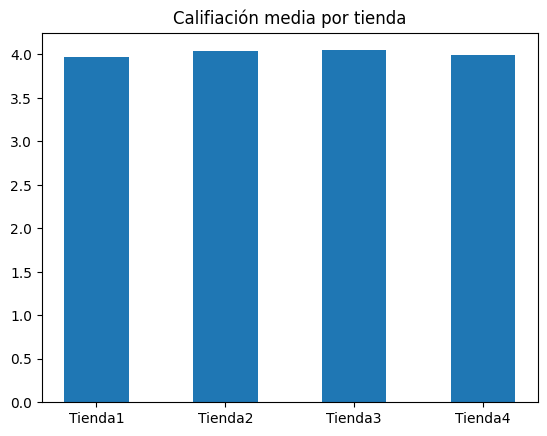

In [76]:
# mostramos la califiación media por tienda en un gráfico de barras
plt.title("Califiación media por tienda")
plt.bar(x = tiendas, height = calificaciones_medias, width=0.5)
plt.show()


In [77]:
# tabla para ver las calificaciones medias por tienda
# imprimimos el encabezado de la tabla
print(f"{'Tienda'.center(20)} | {'Tienda1'.center(10)} | {'Tienda2'.center(10)} | {'Tienda3'.center(10)} | {'Tienda4'.center(10)}")
# imprimimos los valores de las calificaciones medias de cada tienda
print(f"{'Calificación Media'.center(20)} | {str(round(datos[0]['Calificación Media'],2)).center(10)} | {str(round(datos[1]['Calificación Media'],2)).center(10)} | {str(round(datos[2]['Calificación Media'],2)).center(10)} | {str(round(datos[3]['Calificación Media'],2)).center(10)}")

       Tienda        |  Tienda1   |  Tienda2   |  Tienda3   |  Tienda4  
 Calificación Media  |    3.98    |    4.04    |    4.05    |    4.0    


# 4. Productos más y menos vendidos

En este paso, identificamos qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualizamos los resultados para que quede claro qué productos destacaron en ventas en cada tienda.

In [78]:
# iniciamos un contador para ir iterando a su vez dentro de nuestra lista datos, en la tienda correspondiente con indexación d, para añadir los productos y cantidad vendida por tienda
d = 0

# iteraremos sobre los archivos originales de cada tienda
for tienda in (tienda1,tienda2,tienda3,tienda4):
  # añadimos a nuestra tienda en datos, la llave 'productos' inicializada como un diccionario vacío
  datos[d]['productos'] ={}

  # iteramos por tupla obtenida en la lista de items de productos, accediendo siempre al elemento de index 1, ya que el 0 corresponde a número de registro
  for producto in list(tienda['Producto'].items()):

    # si el producto ya se encuentra en nuestro registro, sumamos uno a su valor
    if producto[1] in datos[d]['productos']:
      datos[d]['productos'][producto[1]] += 1
    
    # sino inicializamos el producto en el registro con valor de 1
    else:
      datos[d]['productos'][producto[1]] = 1

  #para ordenar alfabéticamente los productos
  datos[d]['productos'] = dict(sorted(datos[d]['productos'].items()))

  # para continuar iterando sobre nuestras tiendas en datos, sumamos uno a la variable d
  d+=1

# para visualizar
datos

[{'nombre': 'Tienda1',
  'ingresos totales': 1150880400.0,
  'categorias': {'Artículos para el hogar': 171,
   'Deportes y diversión': 284,
   'Electrodomésticos': 312,
   'Electrónicos': 448,
   'Instrumentos musicales': 182,
   'Juguetes': 324,
   'Libros': 173,
   'Muebles': 465},
  'Calificación Media': 3.976685036032217,
  'productos': {'Ajedrez de madera': 49,
   'Armario': 60,
   'Asistente virtual': 40,
   'Auriculares': 50,
   'Auriculares con micrófono': 33,
   'Balón de baloncesto': 55,
   'Balón de voleibol': 42,
   'Batería': 53,
   'Bicicleta': 54,
   'Bloques de construcción': 56,
   'Cama box': 44,
   'Cama king': 44,
   'Carrito de control remoto': 52,
   'Celular ABXY': 33,
   'Ciencia de datos con Python': 39,
   'Cubertería': 52,
   'Cubo mágico 8x8': 44,
   'Cuerda para saltar': 40,
   'Dashboards con Power BI': 42,
   'Dinosaurio Rex': 40,
   'Estufa': 45,
   'Guitarra acústica': 46,
   'Guitarra eléctrica': 47,
   'Impresora': 54,
   'Iniciando en programación': 

Mostrando cantidad de productos vendidos por tienda en formato gráfico de barras

In [129]:
list(datos[0]['productos'].items())

[('Ajedrez de madera', 49),
 ('Armario', 60),
 ('Asistente virtual', 40),
 ('Auriculares', 50),
 ('Auriculares con micrófono', 33),
 ('Balón de baloncesto', 55),
 ('Balón de voleibol', 42),
 ('Batería', 53),
 ('Bicicleta', 54),
 ('Bloques de construcción', 56),
 ('Cama box', 44),
 ('Cama king', 44),
 ('Carrito de control remoto', 52),
 ('Celular ABXY', 33),
 ('Ciencia de datos con Python', 39),
 ('Cubertería', 52),
 ('Cubo mágico 8x8', 44),
 ('Cuerda para saltar', 40),
 ('Dashboards con Power BI', 42),
 ('Dinosaurio Rex', 40),
 ('Estufa', 45),
 ('Guitarra acústica', 46),
 ('Guitarra eléctrica', 47),
 ('Impresora', 54),
 ('Iniciando en programación', 41),
 ('Iphone 15', 49),
 ('Juego de mesa', 43),
 ('Kit de bancas', 44),
 ('Lavadora de ropa', 47),
 ('Lavavajillas', 48),
 ('Mesa de centro', 44),
 ('Mesa de comedor', 40),
 ('Mesa de noche', 56),
 ('Microondas', 60),
 ('Mochila', 39),
 ('Modelado predictivo', 51),
 ('Muñeca bebé', 40),
 ('Olla de presión', 35),
 ('Pandereta', 36),
 ('Refr

In [152]:
def mostrarDatosProductos(ntienda):
    # iniciamos la lista de tuplas de productos a iterar
    listaProductos = list(datos[ntienda-1]['productos'].items())

    # iniciamos las variables a definir
    maxvalor1 = 0
    maxproducto1 = ""
    imax1 = None
    maxvalor2 = 0
    maxproducto2 = ""
    imax2 = None
    maxvalor3 = 0
    maxproducto3 = ""
    imax3 = None
    minvalor = listaProductos[0][1]
    minproducto = listaProductos[0][0]
    imin = 0

    # iniciamos la lista de colores correspondiente a las barras
    colores = []

    
    # iteramos sobre los productos con una tupla de formato (producto, cantidad) en base a número de indexación, para atribuir y luego modificar si es necesario el color de la barra
    for indice in range(len(listaProductos)):
        # si la cantidad del producto es mayor a la cantidad de maxvalor1
        if listaProductos[indice][1] > maxvalor1:
            # el producto y su cantidad ubicados en max1, pasarán a max2
            maxvalor2 = maxvalor1
            maxproducto2 = maxproducto1
            imax2 = imax1
            # y el nuevo producto será el nuevo maxproducto1 y con el maxvalor1
            maxvalor1 = listaProductos[indice][1]
            maxproducto1 = listaProductos[indice][0]
            imax1 = indice
        elif maxvalor2 < listaProductos[indice][1] <= maxvalor1:
            # el producto y su cantidad ubicados en max2, pasarán a max3
            maxvalor3 = maxvalor2
            maxproducto3 = maxproducto2
            imax3 = imax2
            # y el nuevo producto será el nuevo maxproducto2 y con el maxvalor2
            maxvalor2 = listaProductos[indice][1]
            maxproducto2 = listaProductos[indice][0]
            imax2 = indice
        elif maxvalor3 < listaProductos[indice][1] <= maxvalor2:
            # el nuevo producto será el nuevo maxproducto3 y con el maxvalor3
            maxvalor3 = listaProductos[indice][1]
            maxproducto3 = listaProductos[indice][0]
            imax3 = indice
        if listaProductos[indice][1] < minvalor:
            minvalor = listaProductos[indice][1]
            minproducto = listaProductos[indice][0]
            imin = indice

        # agregamos el color base a la lista de colores
        colores.append('#f9c74f')
    
    # modificamos la lista de colores en base a los índices obtenidos
    colores[imax1] = '#277da1'
    colores[imax2] = '#4d908e'
    colores[imax3] = '#43aa8b'
    colores[imin] = '#f94144'
    
    plt.figure(figsize=(15, 5))
    plt.title(f"Cantidad de productos vendidos en la Tienda{ntienda}", fontsize=16, fontweight="bold", color='black')
    plt.bar(x = list(datos[ntienda-1]['productos']), height = list(map(lambda x: x[1], list(datos[ntienda-1]['productos'].items()))), color = colores)
    plt.xticks(rotation=90)
    plt.show()

    # resumiendo datos
    print(f'El producto más vendido en la tienda {ntienda} es el {maxproducto1} con {maxvalor1} unidades')
    print(f'El segundo producto más vendido en la tienda {ntienda} es el {maxproducto2} con {maxvalor2} unidades')
    print(f'El tercer producto más vendido en la tienda {ntienda} es el {maxproducto3} con {maxvalor3} unidades')
    print(f'El producto más vendido en la tienda {ntienda} es el {minproducto} con {minvalor} unidades')
    
    

In [151]:
list(map(lambda x: x[1], list(datos[2]['productos'].items())))

[47,
 49,
 39,
 43,
 39,
 50,
 48,
 41,
 52,
 35,
 46,
 56,
 52,
 44,
 46,
 39,
 44,
 53,
 40,
 46,
 53,
 47,
 38,
 50,
 46,
 46,
 52,
 57,
 42,
 52,
 42,
 56,
 55,
 36,
 36,
 53,
 39,
 47,
 51,
 50,
 45,
 55,
 36,
 46,
 47,
 54,
 46,
 45,
 42,
 48,
 38]

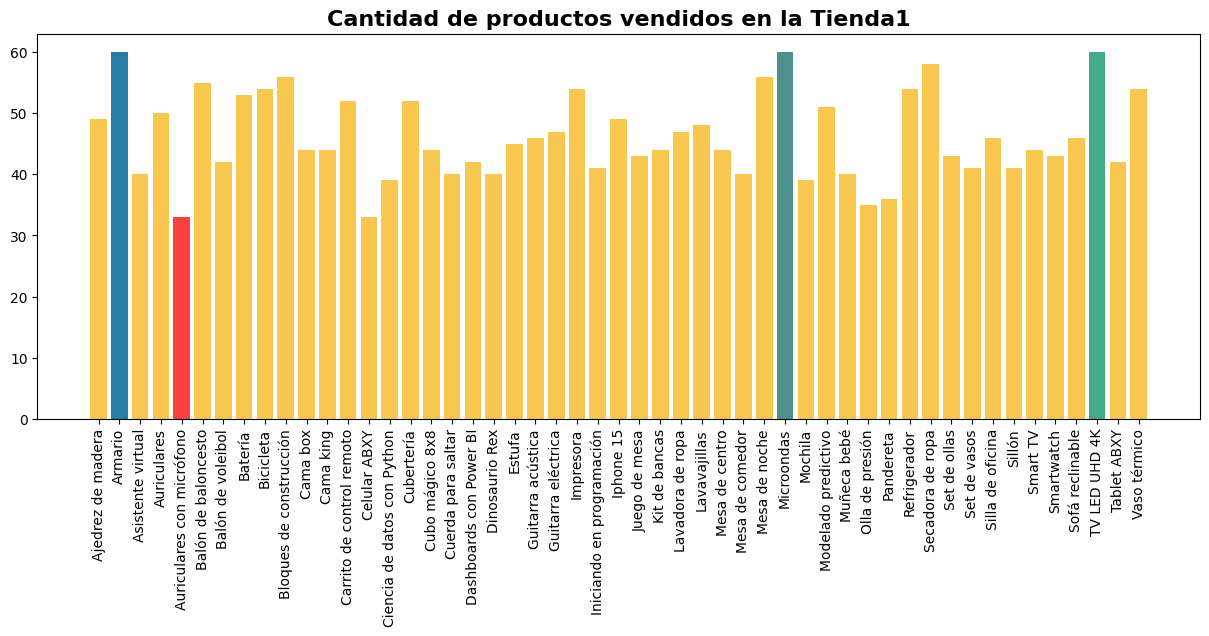

El producto más vendido en la tienda 1 es el Armario con 60 unidades
El segundo producto más vendido en la tienda 1 es el Microondas con 60 unidades
El tercer producto más vendido en la tienda 1 es el TV LED UHD 4K con 60 unidades
El producto más vendido en la tienda 1 es el Auriculares con micrófono con 33 unidades


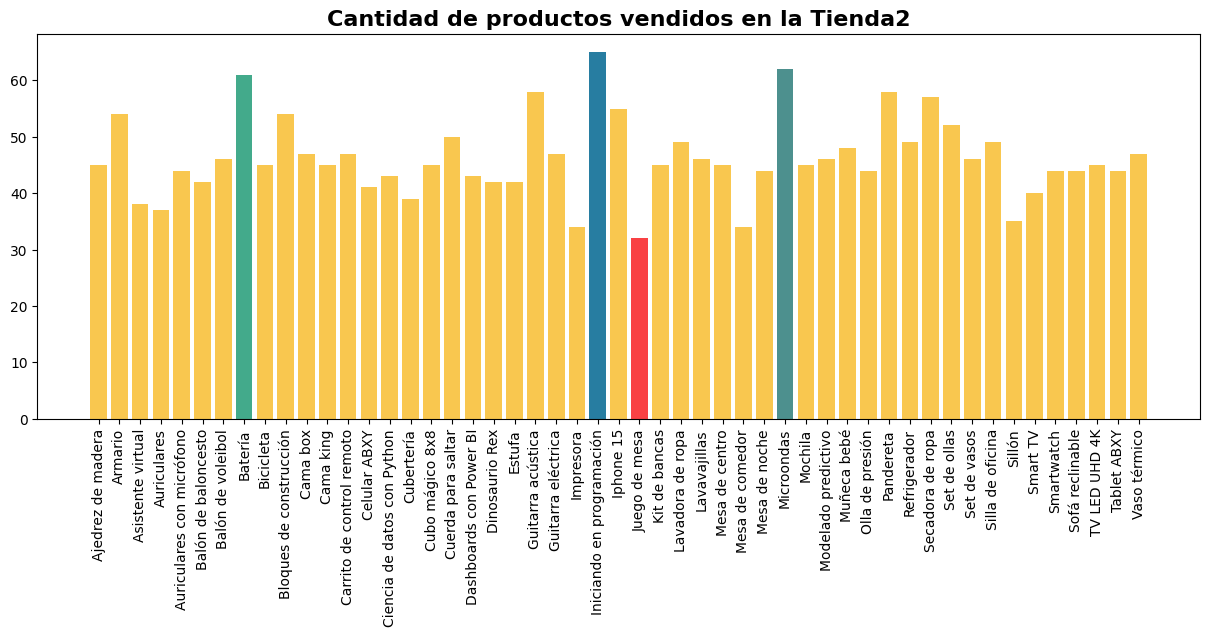

El producto más vendido en la tienda 2 es el Iniciando en programación con 65 unidades
El segundo producto más vendido en la tienda 2 es el Microondas con 62 unidades
El tercer producto más vendido en la tienda 2 es el Batería con 61 unidades
El producto más vendido en la tienda 2 es el Juego de mesa con 32 unidades


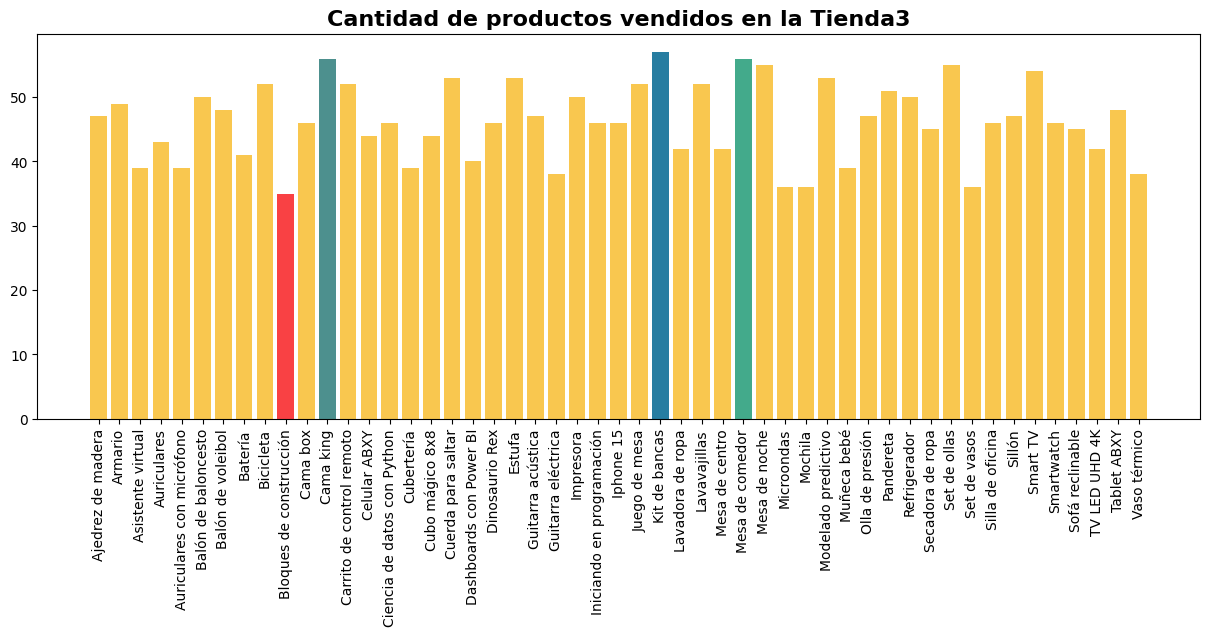

El producto más vendido en la tienda 3 es el Kit de bancas con 57 unidades
El segundo producto más vendido en la tienda 3 es el Cama king con 56 unidades
El tercer producto más vendido en la tienda 3 es el Mesa de comedor con 56 unidades
El producto más vendido en la tienda 3 es el Bloques de construcción con 35 unidades


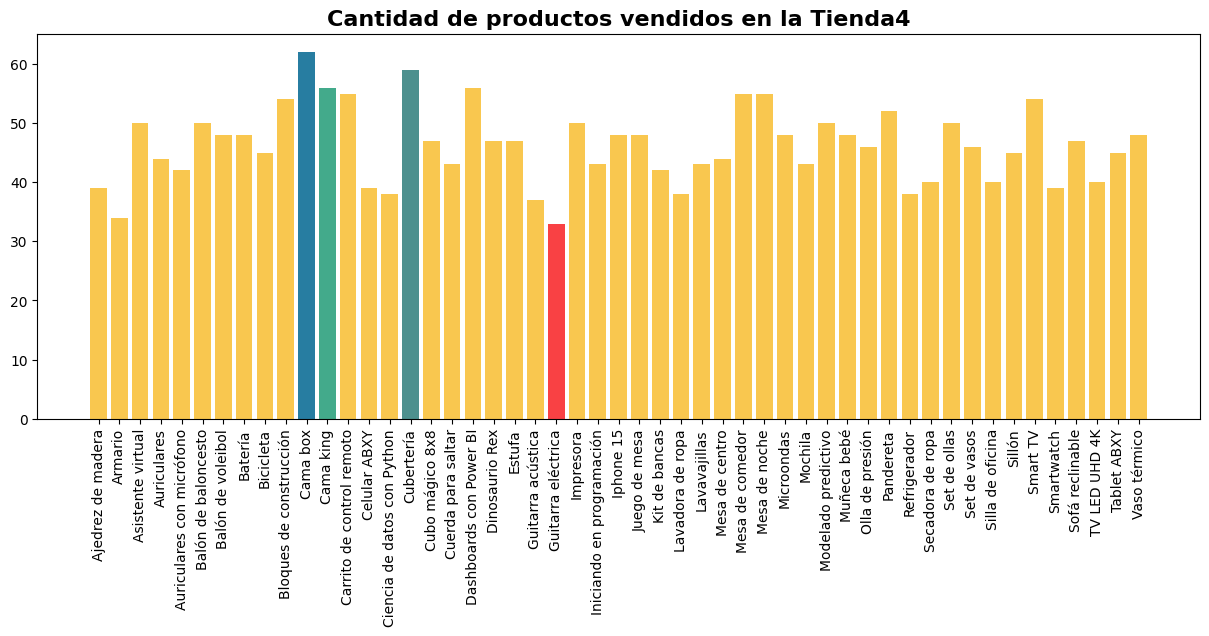

El producto más vendido en la tienda 4 es el Cama box con 62 unidades
El segundo producto más vendido en la tienda 4 es el Cubertería con 59 unidades
El tercer producto más vendido en la tienda 4 es el Cama king con 56 unidades
El producto más vendido en la tienda 4 es el Guitarra eléctrica con 33 unidades


In [153]:
mostrarDatosProductos(1)
mostrarDatosProductos(2)
mostrarDatosProductos(3)
mostrarDatosProductos(4)

# 5. Envío promedio por tienda

En este paso, calculamos el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.

In [157]:
# inicializamos d como contador para iterar en nuestra lista datos a la vez que iteramos entre los archivos originales de nuestras tiendas
d = 0
for tienda in (tienda1, tienda2, tienda3, tienda4):
    # dentro de la tienda, ingresamos a 'Costo de envío', a través de .items() obtenemos la tupla de valores que luego convertimos a lista. Aplicamos .map con ayuda de la función lambda
    # para obtener una lista de únicamente los valores ubicados en la indexación 1, ya que la 0 sólo es un número de registo
    valores = list(map(lambda x: x[1], list(tienda['Costo de envío'].items())))

    # dentro de nuestros datos, correspondiente a la tienda que estamos trabajando, añadimos una llave 'Costo promedio de envío' cuyo valor será el promedio calculado a partir de la lista 'valores'
    datos[d]['Costo promedio de envío'] = sum(valores)/len(valores)

    # sumamos 1 a d para en la siguiente tienda de nuestra iteración, posicionarnos en la siguiente tienda de nuestra lista 'datos'
    d+=1

# pedimos salida sólo para verificar la adición
datos    

[{'nombre': 'Tienda1',
  'ingresos totales': 1150880400.0,
  'categorias': {'Artículos para el hogar': 171,
   'Deportes y diversión': 284,
   'Electrodomésticos': 312,
   'Electrónicos': 448,
   'Instrumentos musicales': 182,
   'Juguetes': 324,
   'Libros': 173,
   'Muebles': 465},
  'Calificación Media': 3.976685036032217,
  'productos': {'Ajedrez de madera': 49,
   'Armario': 60,
   'Asistente virtual': 40,
   'Auriculares': 50,
   'Auriculares con micrófono': 33,
   'Balón de baloncesto': 55,
   'Balón de voleibol': 42,
   'Batería': 53,
   'Bicicleta': 54,
   'Bloques de construcción': 56,
   'Cama box': 44,
   'Cama king': 44,
   'Carrito de control remoto': 52,
   'Celular ABXY': 33,
   'Ciencia de datos con Python': 39,
   'Cubertería': 52,
   'Cubo mágico 8x8': 44,
   'Cuerda para saltar': 40,
   'Dashboards con Power BI': 42,
   'Dinosaurio Rex': 40,
   'Estufa': 45,
   'Guitarra acústica': 46,
   'Guitarra eléctrica': 47,
   'Impresora': 54,
   'Iniciando en programación': 

In [158]:
# tabla para ver el promedio del costo de envío por tienda
# imprimimos el encabezado de la tabla
print(f"{'Tienda'.center(25)} | {'Tienda1'.center(10)} | {'Tienda2'.center(10)} | {'Tienda3'.center(10)} | {'Tienda4'.center(10)}")
# imprimimos los valores de los promedios en los costos de envío de cada tienda
print(f"{'Costo Promedio de Envío'.center(25)} | {str(round(datos[0]['Costo promedio de envío'],2)).center(10)} | {str(round(datos[1]['Costo promedio de envío'],2)).center(10)} | {str(round(datos[2]['Costo promedio de envío'],2)).center(10)} | {str(round(datos[3]['Costo promedio de envío'],2)).center(10)}")

          Tienda          |  Tienda1   |  Tienda2   |  Tienda3   |  Tienda4  
 Costo Promedio de Envío  |  26018.61  |  25216.24  |  24805.68  |  23459.46 


In [ ]:
tienda1.head(len(tienda1))

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359
...,...,...,...,...,...,...,...,...,...,...,...,...
2354,Iphone 15,Electrónicos,1284400.0,66600.0,15/11/2021,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359
2355,Impresora,Electrónicos,282800.0,15300.0,18/03/2023,Lucas Olivera,Bogotá,5,Nequi,1,4.60971,-74.08175
2356,Juego de mesa,Juguetes,122900.0,7200.0,06/07/2021,Lucas Olivera,Cali,5,Tarjeta de crédito,4,3.43722,-76.52250
2357,Cama box,Muebles,691300.0,35000.0,02/05/2022,Pedro Gomez,Pasto,1,Tarjeta de crédito,2,1.21361,-77.28111
